In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense , BatchNormalization
from keras import Sequential

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.drop(columns=['User ID','Gender'],inplace=True)

In [7]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


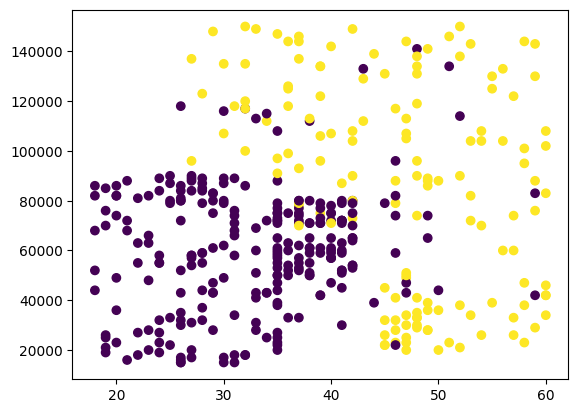

In [9]:
plt.scatter(df['Age'],df['EstimatedSalary'],c=df['Purchased'])

In [8]:
x = df.drop('Purchased',axis=1).values
y = df['Purchased'].values

In [10]:
model1 = Sequential()

model1.add(Dense(2,activation='relu',input_dim=2))
model1.add(Dense(2,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [11]:
model1.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [20]:
history1 = model1.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 48ms/step - loss: 0.6063 - accuracy: 0.7125 - val_loss: 0.8392 - val_accuracy: 0.3625
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6060 - accuracy: 0.7125 - val_loss: 0.8401 - val_accuracy: 0.3625
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6058 - accuracy: 0.7125 - val_loss: 0.8415 - val_accuracy: 0.3625
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6056 - accuracy: 0.7125 - val_loss: 0.8432 - val_accuracy: 0.3625
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6053 - accuracy: 0.7125 - val_loss: 0.8447 - val_accuracy: 0.3625
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6051 - accuracy: 0.7125 - val_loss: 0.8462 - val_accuracy: 0.3625
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6048 - accuracy: 0.7125 - val_loss: 0.8475 - val_accuracy: 0.3625
Epoch 

10/10 [==============================] - 0s 11ms/step - loss: 0.6003 - accuracy: 0.7125 - val_loss: 0.8965 - val_accuracy: 0.3625
Epoch 59/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6003 - accuracy: 0.7125 - val_loss: 0.8973 - val_accuracy: 0.3625
Epoch 60/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6003 - accuracy: 0.7125 - val_loss: 0.8975 - val_accuracy: 0.3625
Epoch 61/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6002 - accuracy: 0.7125 - val_loss: 0.8979 - val_accuracy: 0.3625
Epoch 62/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6003 - accuracy: 0.7125 - val_loss: 0.8988 - val_accuracy: 0.3625
Epoch 63/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6002 - accuracy: 0.7125 - val_loss: 0.8992 - val_accuracy: 0.3625
Epoch 64/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6002 - accuracy: 0.7125 - val_loss: 0.8998 - val_accuracy: 0.3625
Epoch 65/100

9600/9600 [==============================] - 22s 2ms/step


E:\anaconda\envs\tf\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

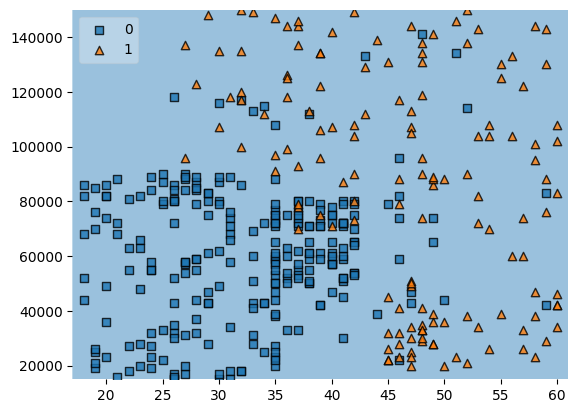

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)

## Using Batch Normalization

In [15]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization (BatchN  (None, 3)                12        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 40
Trainable params: 30
Non-trainable pa

In [17]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [18]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 3s 72ms/step - loss: 0.8741 - accuracy: 0.2031 - val_loss: 1.5001 - val_accuracy: 0.3625
Epoch 2/100
10/10 [==============================] - 0s 16ms/step - loss: 0.8552 - accuracy: 0.2219 - val_loss: 1.0661 - val_accuracy: 0.3625
Epoch 3/100
10/10 [==============================] - 0s 16ms/step - loss: 0.8401 - accuracy: 0.2188 - val_loss: 0.8932 - val_accuracy: 0.3625
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 0.8210 - accuracy: 0.2438 - val_loss: 0.8045 - val_accuracy: 0.3625
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.8053 - accuracy: 0.2812 - val_loss: 0.7535 - val_accuracy: 0.3625
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 0.7867 - accuracy: 0.2844 - val_loss: 0.7242 - val_accuracy: 0.3625
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.7738 - accuracy: 0.2719 - val_loss: 0.7047 - val_accuracy: 0.3750
Epoch 

10/10 [==============================] - 0s 11ms/step - loss: 0.4615 - accuracy: 0.8156 - val_loss: 0.8518 - val_accuracy: 0.5500
Epoch 59/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4627 - accuracy: 0.8188 - val_loss: 0.8610 - val_accuracy: 0.5500
Epoch 60/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4591 - accuracy: 0.8281 - val_loss: 0.8628 - val_accuracy: 0.5500
Epoch 61/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4533 - accuracy: 0.8313 - val_loss: 0.8545 - val_accuracy: 0.5500
Epoch 62/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4645 - accuracy: 0.8156 - val_loss: 0.8484 - val_accuracy: 0.5500
Epoch 63/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4625 - accuracy: 0.8188 - val_loss: 0.8609 - val_accuracy: 0.5500
Epoch 64/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4575 - accuracy: 0.8250 - val_loss: 0.8483 - val_accuracy: 0.5500
Epoch 65/100

9600/9600 [==============================] - 27s 3ms/step


E:\anaconda\envs\tf\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

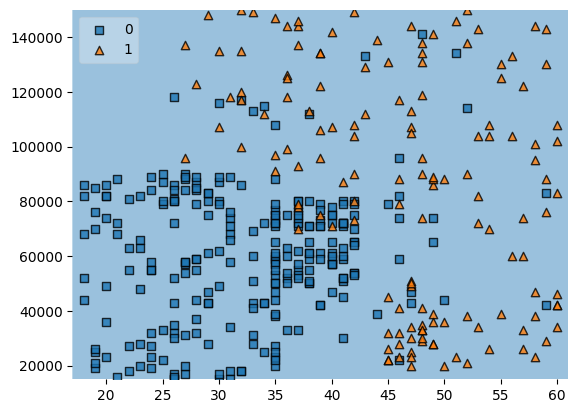

In [19]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)

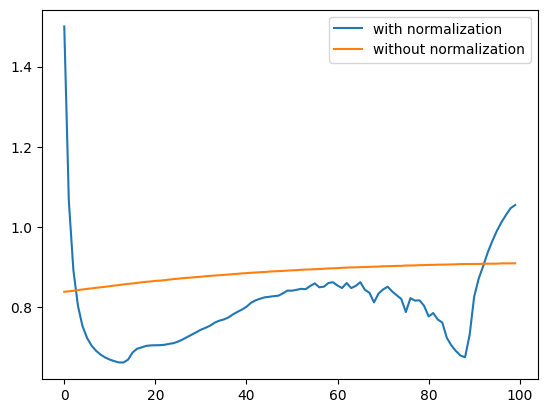

In [23]:
plt.plot(history.history['val_loss'],label='with normalization')
plt.plot(history1.history['val_loss'],label='without normalization')
plt.legend()
plt.show()

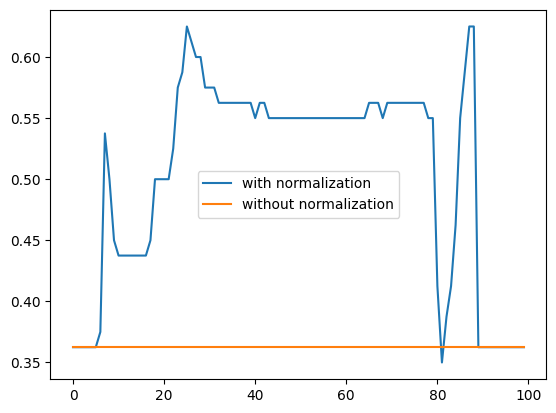

In [25]:
plt.plot(history.history['val_accuracy'],label='with normalization')
plt.plot(history1.history['val_accuracy'],label='without normalization')
plt.legend()
plt.show()